In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


###These are some additional information about the crouses gathered by exploring the course pages on edX, including '*course launch dates, course registration opening, last day of the courses*'. Last two (*subject_popularity, famous_instructor*) are popularity of course subjects and instructors based on number of google hits they have. 

In [7]:
regis_open = {'HarvardX/CB22x/2013_Spring':'2012-12-19', 'HarvardX/CS50x/2012':'2012-07-24', 
                     'HarvardX/ER22x/2013_Spring':'2012-12-19', 'HarvardX/PH207x/2012_Fall':'2012-07-24',
                    'HarvardX/PH278x/2013_Spring':'2012-12-19',             
              'MITx/6.002x/2012_Fall': '2012-07-24',
             'MITx/6.00x/2012_Fall':'2012-07-24',
                  'MITx/3.091x/2012_Fall':'2012-07-24',
                   'MITx/6.00x/2013_Spring':'2012-12-19',
                         'MITx/3.091x/2013_Spring':'2012-12-20', 
                 'MITx/14.73x/2013_Spring':'2012-12-19',
                  'MITx/8.02x/2013_Spring':'2013-01-17', 
                 'MITx/6.002x/2013_Spring':'2012-12-20', 
                  'MITx/7.00x/2013_Spring':'2013-01-30',
           'MITx/2.01x/2013_Spring':'2013-02-24',                     
                 'MITx/8.MReV/2013_Summer':'2013-04-27' }

course_launch = {'HarvardX/CB22x/2013_Spring':'2013-03-13', 'HarvardX/CS50x/2012':'2012-10-15', 
                     'HarvardX/ER22x/2013_Spring':'2013-03-02', 'HarvardX/PH207x/2012_Fall':'2012-10-15',
                    'HarvardX/PH278x/2013_Spring':'2013-05-15',
              'MITx/6.002x/2012_Fall': '2012-09-05',
             'MITx/6.00x/2012_Fall':'2012-09-26',
                  'MITx/3.091x/2012_Fall':'2012-10-09',
                   'MITx/6.00x/2013_Spring':'2013-02-04',
                         'MITx/3.091x/2013_Spring':'2013-02-05', 
                 'MITx/14.73x/2013_Spring':'2013-02-12',
                  'MITx/8.02x/2013_Spring':'2013-02-18', 
                 'MITx/6.002x/2013_Spring':'2013-03-03', 
                  'MITx/7.00x/2013_Spring':'2013-03-05',
           'MITx/2.01x/2013_Spring':'2013-04-15',                     
                 'MITx/8.MReV/2013_Summer':'2013-06-01'}

course_wrap = {'HarvardX/CB22x/2013_Spring':'2013-08-26', 'HarvardX/CS50x/2012':'2013-04-15', 
                     'HarvardX/ER22x/2013_Spring':'2013-07-26', 'HarvardX/PH207x/2012_Fall':'2013-01-30',
                    'HarvardX/PH278x/2013_Spring':'2013-07-25',               
              'MITx/6.002x/2012_Fall': '2012-12-25',
             'MITx/6.00x/2012_Fall':'2013-01-15',
                  'MITx/3.091x/2012_Fall':'2013-01-15',
                   'MITx/6.00x/2013_Spring':'2013-06-04',
                         'MITx/3.091x/2013_Spring':'2013-06-21', 
                 'MITx/14.73x/2013_Spring':'2013-05-21',
                  'MITx/8.02x/2013_Spring':'2013-06-18', 
                 'MITx/6.002x/2013_Spring':'2013-07-01', 
                  'MITx/7.00x/2013_Spring':'2013-06-06',
           'MITx/2.01x/2013_Spring':'2013-07-30',                     
                 'MITx/8.MReV/2013_Summer':'2013-09-15' }

subject_popularity = {'HarvardX/CB22x/2013_Spring':1900000, 'HarvardX/CS50x/2012':245000000, 
                     'HarvardX/ER22x/2013_Spring':500000000, 'HarvardX/PH207x/2012_Fall':10000000,
                    'HarvardX/PH278x/2013_Spring':100000000,'MITx/6.002x/2012_Fall':16000000,
                'MITx/6.00x/2012_Fall':100000000, 
                'MITx/3.091x/2012_Fall':57000000,'MITx/6.00x/2013_Spring':100000000,
                 'MITx/3.091x/2013_Spring':57000000, 'MITx/14.73x/2013_Spring':26000000,
                'MITx/8.02x/2013_Spring':8000000, 'MITx/6.002x/2013_Spring':16000000,
                'MITx/7.00x/2013_Spring':200000000, 'MITx/2.01x/2013_Spring':280000000,
                 'MITx/8.MReV/2013_Summer':100000000}

famous_instrustor = {'HarvardX/CB22x/2013_Spring':600000, 'HarvardX/CS50x/2012':468000, 
                     'HarvardX/ER22x/2013_Spring':500000, 'HarvardX/PH207x/2012_Fall':366000,
                    'HarvardX/PH278x/2013_Spring':366000, 'MITx/6.002x/2012_Fall':457000,
               'MITx/6.00x/2012_Fall':100000, 'MITx/3.091x/2012_Fall':1250000, 
               'MITx/6.00x/2013_Spring':100000,
               'MITx/3.091x/2013_Spring':1250000, 'MITx/14.73x/2013_Spring':500000,
                'MITx/8.02x/2013_Spring':1100000, 'MITx/6.002x/2013_Spring':457000,
                'MITx/7.00x/2013_Spring':650000,'MITx/2.01x/2013_Spring':80000,
                'MITx/8.MReV/2013_Summer':10000000}

###Loading the data into a pandas dataframe and adding new features to it.

In [56]:
df = pd.read_csv('../HMXPC13_DI_v2_5-14-14.csv')

# add course launch and wrap dates:
dt1 = []
dt2 = []
dt3 = []
dt4 = []
dt5 = []
for c in df['course_id']:
    dt1.append(course_launch[c])
    dt2.append(course_wrap[c])
    dt3.append(subject_popularity[c])
    dt4.append(famous_instrustor[c])
    dt5.append(regis_open[c])

df['course_launch'] = dt1
df['course_wrap'] = dt2
df['subject'] = dt3
df['instructor'] = dt4
df['regis_open'] = dt5
del dt1, dt2, dt3, dt4, dt5

#add number of courses each student has signed up for. 
student_courses = {}
    
for student in df['userid_DI']:
    if student not in student_courses:
        student_courses[student] = 1
    else:
        student_courses[student] += 1

z = []    
for st in df['userid_DI']:
    z.append(student_courses[st])
    
df['no_courses'] = z
del z, student_courses

df = df.applymap(lambda x: np.nan if isinstance(x, basestring) and x.isspace() else x) # replace blank cells with NaN
del df['roles'] # same for all
df = df[pd.isnull(df.incomplete_flag)] # remove internally inconsistent records (flag = 1)
del df['incomplete_flag'], df['registered']
df.index = arange(df.shape[0])

In [57]:
df.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,ndays_act,nplay_video,nchapters,nforum_posts,course_launch,course_wrap,subject,instructor,regis_open,no_courses
0,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,0,United States,NaN,NaN,NaN,0,...,16,50,12,0,2012-10-15,2013-01-30,10000000,366000,2012-07-24,15
1,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,France,NaN,NaN,NaN,0,...,6,NaN,3,0,2013-03-13,2013-08-26,1900000,600000,2012-12-19,4
2,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,3,NaN,3,0,2013-03-13,2013-08-26,1900000,600000,2012-12-19,7
3,HarvardX/ER22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,2,NaN,2,0,2013-03-02,2013-07-26,500000000,500000,2012-12-19,7
4,HarvardX/ER22x/2013_Spring,MHxPC130198098,1,0,0,United States,NaN,NaN,NaN,0,...,1,NaN,3,0,2013-03-02,2013-07-26,500000000,500000,2012-12-19,2


##What is the certification and course view rate among registrants?

In [54]:
print "Certification rate: %d%%\nView rate: %d%%." % (100.*mean(df['certified']), 100*mean(df['viewed']))

Certification rate: 3%
View rate: 60%.


### One expects that various dates and time periods such as *course duration, student registration date*, etc. play role in student engagement with courses. I include some of these as new features.

In [84]:
student_regis_to_launch = []
course_duration = []
last_event_to_launch = []
regis_open_to_launch = []

for i in df.index:#xrange(df.shape[0]): 
    d1 = df['start_time_DI'][i] # registration date
    d2 = df['last_event_DI'][i] # last interaction with course
    d3 = df['course_launch'][i]  # start date of course
    d4 = df['course_wrap'][i] # last day of course
    d5 = df['regis_open'][i] # registration opened
    
    yr13 = int(d1[:4]) - int(d3[:4])
    m13 = int(d1[5:7]) - int(d3[5:7])
    d13 = int(d1[8:]) - int(d3[8:])
    student_regis_to_launch.append((yr13*365+m13*30+d13)/7.)  
    
    yr43 = int(d4[:4]) - int(d3[:4])
    m43 = int(d4[5:7]) - int(d3[5:7])
    d43 = int(d4[8:]) - int(d3[8:])
    course_duration.append((yr43*365+m43*30+d43)/7.)   
    
    yr53 = int(d5[:4]) - int(d3[:4])
    m53 = int(d5[5:7]) - int(d3[5:7])
    d53 = int(d5[8:]) - int(d3[8:])    
    regis_open_to_launch.append((yr53*365+m53*30+d53)/7.)
    
    if pd.notnull(d2):        
        yr23 = int(d2[:4]) - int(d3[:4])
        m23 = int(d2[5:7]) - int(d3[5:7])
        d23 = int(d2[8:]) - int(d3[8:])
        last_event_to_launch.append((yr23*365+m23*30+d23)/7.)         
    else: #no interaction beyond registration:
        last_event_to_launch.append((yr13*365+m13*30+d13)/7.) 
        #weeks_in_course.append(0)  
        
df['student_regis_to_launch'] = student_regis_to_launch
df['course_duration'] = course_duration
df['last_event_to_launch'] = last_event_to_launch
df['regis_open_to_launch'] = regis_open_to_launch
del student_regis_to_launch, course_duration, last_event_to_launch, regis_open_to_launch

#remove inconsistence data where last_event_DI < start_time_DI:
#df = df[df['weeks_in_course'] >= 0]
#df.index = arange(df.shape[0])

In [85]:
df.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,course_launch,course_wrap,subject,instructor,regis_open,no_courses,student_regis_to_launch,course_duration,last_event_to_launch,regis_open_to_launch
0,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,0,United States,NaN,NaN,NaN,0,...,2012-10-15,2013-01-30,10000000,366000,2012-07-24,15,-4.000000,15.714286,31.857143,-11.571429
1,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,France,NaN,NaN,NaN,0,...,2013-03-13,2013-08-26,1900000,600000,2012-12-19,4,-10.285714,23.285714,8.714286,-12.714286
2,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,2013-03-13,2013-08-26,1900000,600000,2012-12-19,7,-3.571429,23.285714,0.571429,-12.714286
3,HarvardX/ER22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,2013-03-02,2013-07-26,500000000,500000,2012-12-19,7,-1.285714,20.571429,14.571429,-11.142857
4,HarvardX/ER22x/2013_Spring,MHxPC130198098,1,0,0,United States,NaN,NaN,NaN,0,...,2013-03-02,2013-07-26,500000000,500000,2012-12-19,2,15.000000,20.571429,15.000000,-11.142857


In [90]:
df.columns

Index([u'course_id', u'userid_DI', u'viewed', u'explored', u'certified',
       u'final_cc_cname_DI', u'LoE_DI', u'YoB', u'gender', u'grade',
       u'start_time_DI', u'last_event_DI', u'nevents', u'ndays_act',
       u'nplay_video', u'nchapters', u'nforum_posts', u'course_launch',
       u'course_wrap', u'subject', u'instructor', u'regis_open', u'no_courses',
       u'student_regis_to_launch', u'course_duration', u'last_event_to_launch',
       u'regis_open_to_launch'],
      dtype='object')

### Distribution of 'time between student registration and course launch' suggests that student registration accelerates rapidly close to launch date after which it constantly falls down. 

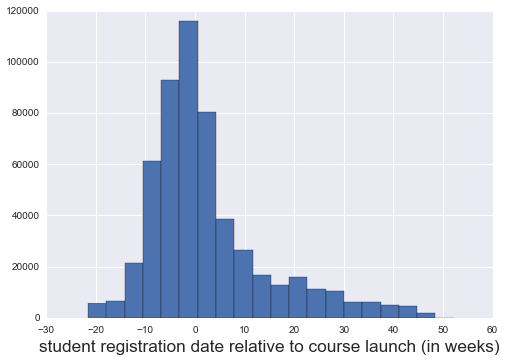

In [91]:
sns.set_style('darkgrid')

plt.xlabel('student registration date relative to course launch (in weeks)', fontsize = 'xx-large')
plt.hist(df['student_regis_to_launch'], 20);

### Some students showed no activity beyond registration (~ 15%). I remove these students, then export the remaining into a new dataframe *df_out* for exploration and learning. 

In [99]:
df_out = df[pd.notnull(df.last_event_DI)] # remove students with no activity

del df_out['userid_DI'], df_out['start_time_DI'], df_out['regis_open']
del df_out['last_event_DI'], df_out['course_launch'], df_out['course_wrap'], df_out['final_cc_cname_DI']
df_out.index = arange(df_out.shape[0])
df_out.to_csv('learn.csv', index = False)

In [100]:
df_out.head()

,course_id,viewed,explored,certified,LoE_DI,YoB,gender,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,subject,instructor,no_courses,student_regis_to_launch,course_duration,last_event_to_launch,regis_open_to_launch
0,HarvardX/PH207x/2012_Fall,1,1,0,NaN,NaN,NaN,0,502,16,50,12,0,10000000,366000,15,-4.000000,15.714286,31.857143,-11.571429
1,HarvardX/CB22x/2013_Spring,1,0,0,NaN,NaN,NaN,0,42,6,NaN,3,0,1900000,600000,4,-10.285714,23.285714,8.714286,-12.714286
2,HarvardX/CB22x/2013_Spring,1,0,0,NaN,NaN,NaN,0,70,3,NaN,3,0,1900000,600000,7,-3.571429,23.285714,0.571429,-12.714286
3,HarvardX/ER22x/2013_Spring,1,0,0,NaN,NaN,NaN,0,17,2,NaN,2,0,500000000,500000,7,-1.285714,20.571429,14.571429,-11.142857
4,HarvardX/ER22x/2013_Spring,1,0,0,NaN,NaN,NaN,0,32,1,NaN,3,0,500000000,500000,2,15.000000,20.571429,15.000000,-11.142857


### The following is the histogram of churn dates (relative to course launch dates). 

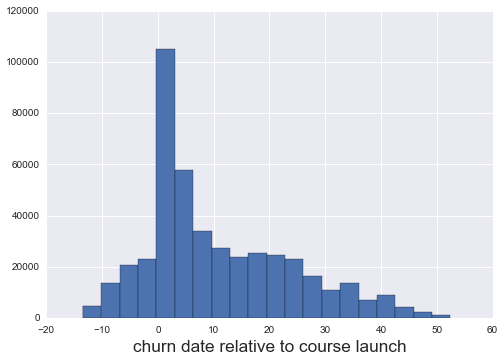

In [114]:
plt.hist(df_out['last_event_to_launch'], 20)
plt.xlabel('churn date relative to course launch', fontsize = 'xx-large');

## What about churn *rate* as a function of time?
The above histogram gives absolute number of churns vs time. The following shows the percentage of students who churn the course (out of all who are active at that week) as a function of time, averaged over all courses. It shows that the drop rate decreases as courses proceed. 

Interestingly, churn rate jumps once courses start (week 0) but then it falls down. 


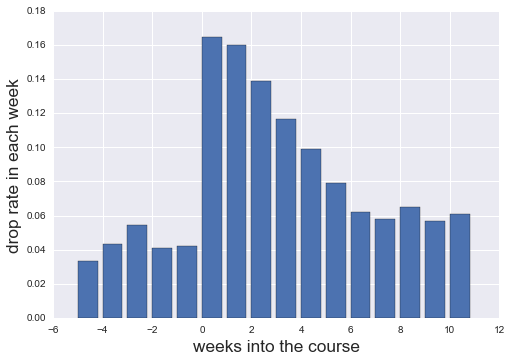

In [131]:
courses = df_out['course_id'].unique()
x = linspace(-5, 10, 16)

st = [0 for i in xrange(16)]
for c in courses:
    df_course = df_out[df_out['course_id'] == c] #data for those registered in course 'c'
    df_course = df_course[df_course['student_regis_to_launch'] <= 0] # only those who registered before the course started
    df_course.index = arange(df_course.shape[0])
    n_students = []
    for wk in x:
        all_after = df_course[df_course['last_event_to_launch'] >= wk]
        #temp = df_course[df_course['last_event_to_launch'] >= wk]
        #temp = temp[temp['last_event_to_launch'] < wk+1]
        temp = all_after[all_after['last_event_to_launch'] < wk+1]
        n_students.append(1.*len(temp)/len(all_after))

    st = np.add(st, n_students)    
        
plt.xlabel('weeks into the course', fontsize = 'xx-large')
plt.ylabel('drop rate in each week', fontsize = 'xx-large')
plt.bar(x, st/len(courses));
del df_course, all_after, temp
print 'Interestingly, churn rate jumps once courses start (week 0) but then it falls down. '

### Churn before course launch is high at ~45%. These is a results of fact that early registring students sometimes need to wait for long time for the courses to start.

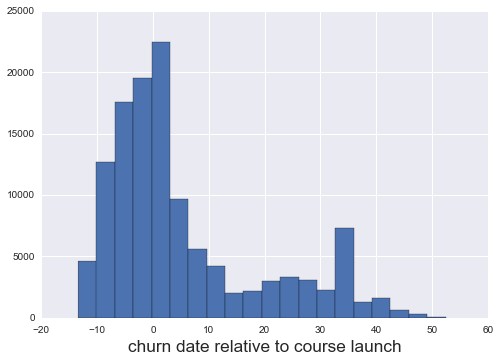

In [113]:
plt.hist(y['last_event_to_launch'], 20)
plt.xlabel('churn date relative to course launch', fontsize = 'xx-large');

### The following histograms show that there is a clear difference between those who viewed some of course content and those who didn't view any, in terms of when they last visited the course page. 

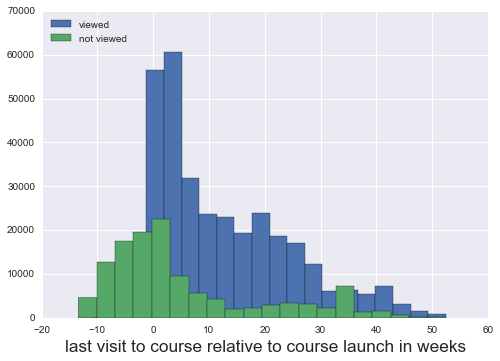

In [110]:
x = df_out[df_out['viewed'] == 1]
x.index = arange(len(x))

y = df_out[df_out['viewed'] == 0]
y.index = arange(len(y))

plt.xlabel('last visit to course relative to course launch in weeks', fontsize = 'xx-large')
plt.hist(x['last_event_to_launch'], 20,label='viewed')
plt.legend(loc='upper center', shadow=True)

plt.hist(y['last_event_to_launch'], 20, label='not viewed')
plt.legend(loc='upper left', shadow=True)

#plt.savefig('last_to_launch.eps', format='eps')
plt.show()

#pie charts

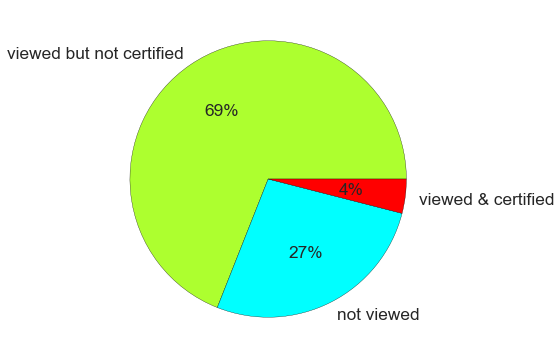

In [17]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(6,6))
ax = fig.add_axes([0.9, 0.1, 0.8, 0.8])

labels = 'viewed but not certified', 'not viewed', 'viewed & certified'
fracs = [69, 27, 4]
colors = ['greenyellow', 'cyan', 'red']


patches, texts, autotexts = ax.pie(fracs,colors=colors, labels = labels, autopct='%1.0f%%')

proptease = fm.FontProperties()
proptease.set_size('xx-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
#plt.savefig('pie.png', format='png', orientation='vertical')
plt.show()

### The following shows that certification rate is highest for those who register close to course launch date, after which it rapidly falls down. This is possibly due to the fact that, once registered late, it is harder to catch up in online courses where students are more or less on their own.

The course view rate, however, remains constant after course starts. 
note: Studies have shown that synchronizing student registration and course launch is a big challenge in mooc.  

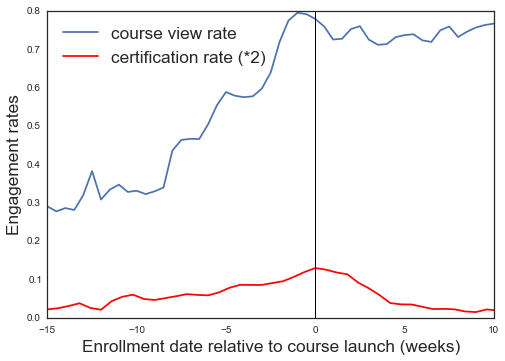

In [143]:
out2 = []
out4 = []
for wk in np.linspace(-15, 15, 51):#xrange(-end, end/2, 2):
    #temp = df_out[df_out['regis_to_start'] < wk]
    temp = df[df['student_regis_to_launch'] < wk]
    
    temp = temp[temp['student_regis_to_launch'] >= wk-1] #temp: those who registered during [wk-1, wk)
    out2.append(mean(temp['viewed'] == 1))   
    out4.append(2*mean(temp['certified'] == 1))
        

sns.set_style('white')
plt.xlim([-15,10])
#plt.ylabel('Enrollment')
plt.xlabel('Enrollment relative to launch')

plt.plot(np.linspace(-15, 10, 51), out2, label="course view rate")
#plt.plot(np.linspace(-15, 15, 51), out3, label="explored (*2)")
plt.plot(np.linspace(-15, 15, 51), out4, label="certification rate (*2)", color='r')
#plt.ylim([0, .08])

plt.xlabel('Enrollment date relative to course launch (weeks)',  fontsize = 'xx-large')
plt.ylabel('Engagement rates', fontsize = 'xx-large')
plt.legend(loc="upper left", fontsize = 'xx-large')
plt.axvline(x=0.0, ymin=0, ymax = 1, linewidth=1, color='k');
#plt.savefig('engagement.eps', format='eps')

## Engagement rates for students registring before and after course launch:

In [96]:
#Dsitribution of student registration before and after lanuch: 
regis_before = [df_out['regis_to_start'][i] for i in xrange(df_out.shape[0]) if df_out['regis_to_start'][i] <= 0]
print "Registration before and after course launch: %d%%, %d%%." % (100.*len(regis_before)/len(df_out['viewed']), 100 - 100.*len(regis_before)/len(df_out['viewed']))

Registration before and after course launch: 48%, 51%.


In [99]:
#certification rate before and after course started:
before = [df_out['certified'][i] for i in xrange(df_out.shape[0]) if df_out['regis_to_start'][i] <= 0]
after = [df_out['certified'][i] for i in xrange(df_out.shape[0]) if df_out['regis_to_start'][i] > 0]

print "Certification rate before and after course launch: %.1f%%, %.1f%%." % (100*mean(before), 100*mean(after)) #(100*mean(before)/mean(df_out['certified'])-100)

Certification rate before and after course launch: 5.4%, 2.6%.


In [100]:
#View rate for those who registered before course started:
view_before = [df_out['viewed'][i] for i in xrange(df_out.shape[0]) if df_out['regis_to_start'][i] <= 0]
view_after = [df_out['viewed'][i] for i in xrange(df_out.shape[0]) if df_out['regis_to_start'][i] > 0]

print "View rate before and after course launch: %.1f%%, %.1f%%." % (100*mean(view_before), 100*mean(view_after))  

View rate before and after course launch: 65.0%, 79.3%.


### These (above) suggest that, while students registration is distributed about equally before and after course launch, those registring before are *twice more likely to be certified*. 

### It also shows that view rate is even higher among those registered after course launch. Since viewing the course content is a desirable activity that open courses are generally designed to support, it is therefore important to keep course registration open and fluid allowing students to register for the course anytime.   

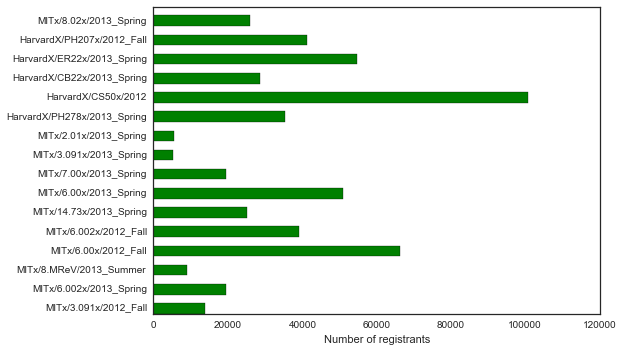

In [84]:
N = 16
menMeans   = count.values() 
ind = np.arange(N)   
width = 0.55       

p1 = plt.barh(ind, menMeans,   width, color='g')

plt.xlabel('Number of registrants')
plt.yticks(ind+width/2., count.keys(),rotation=00)

plt.show()